Step 1: Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf

%matplotlib inline
np.random.seed(16)

import warnings
warnings.filterwarnings("ignore")

Step 2: Load data and Perform Basic Analysis

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Display basic statistical measures
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Check for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

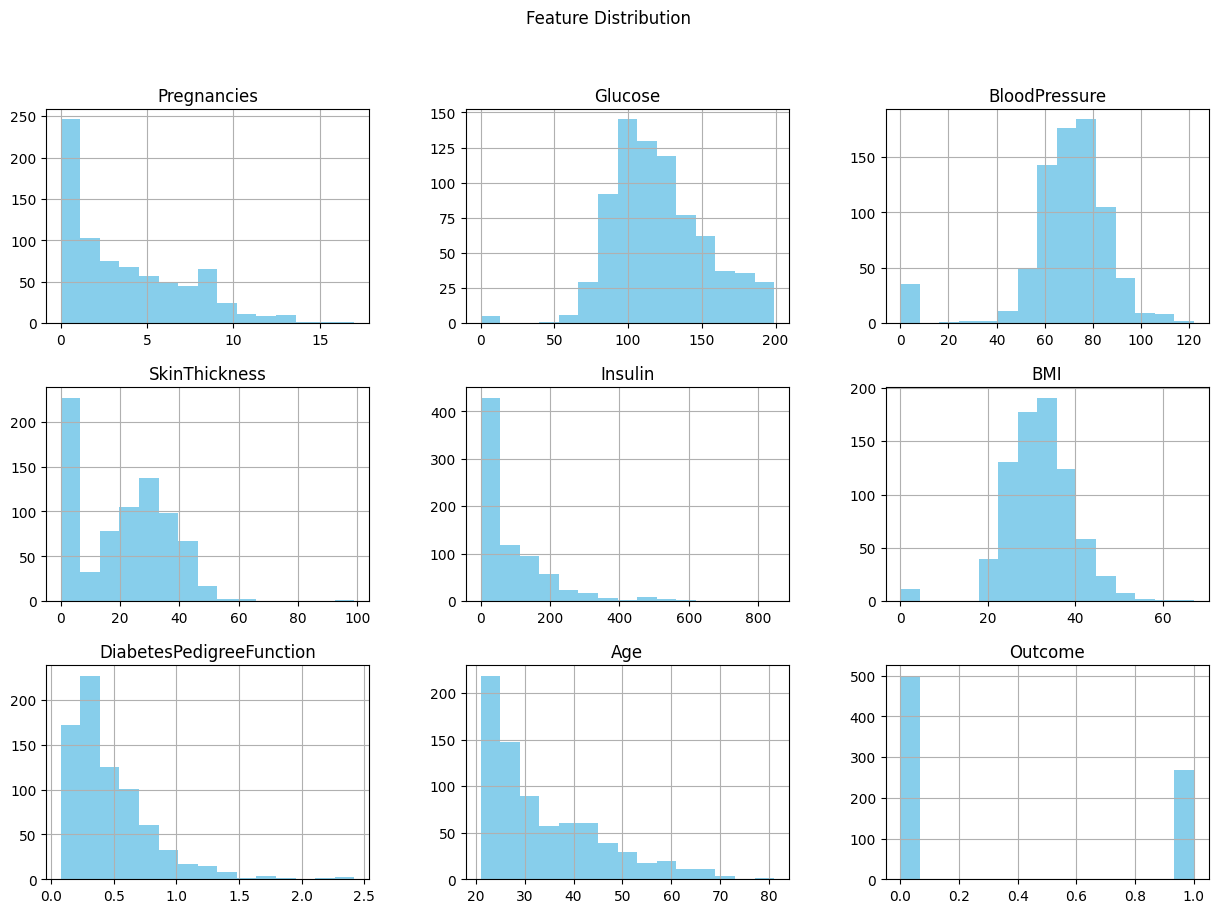

In [5]:
# Plot histograms for each feature
data.hist(bins=15, figsize=(15, 10), color='skyblue')
plt.suptitle('Feature Distribution')
plt.show()

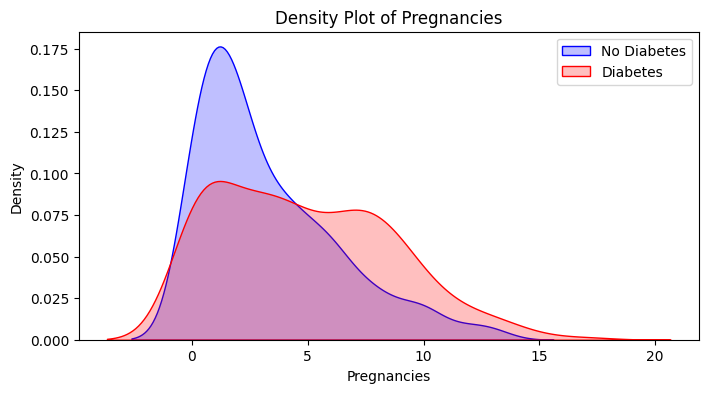

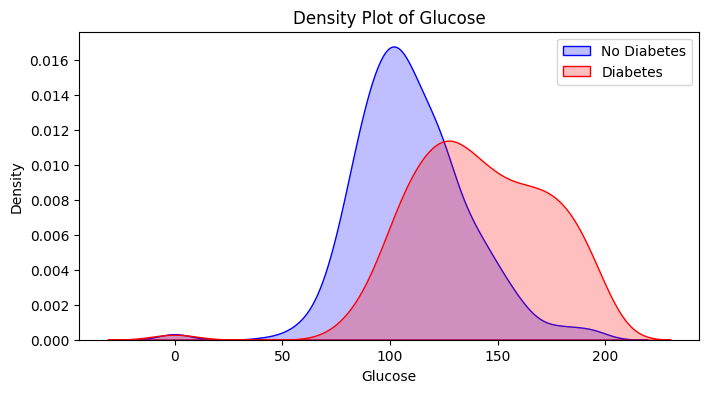

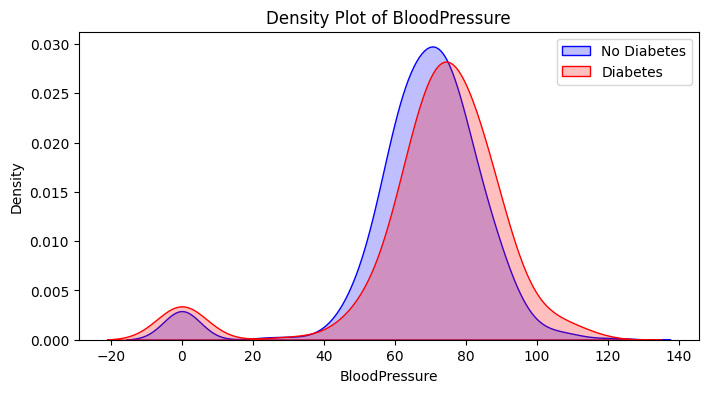

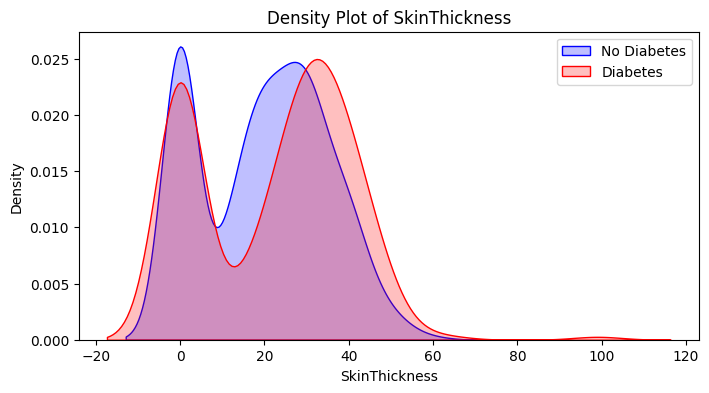

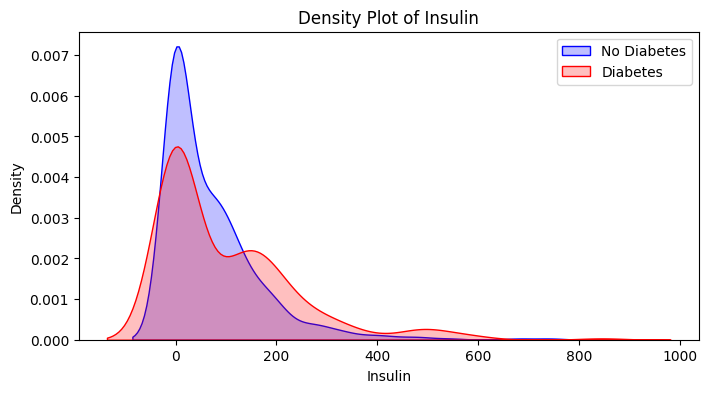

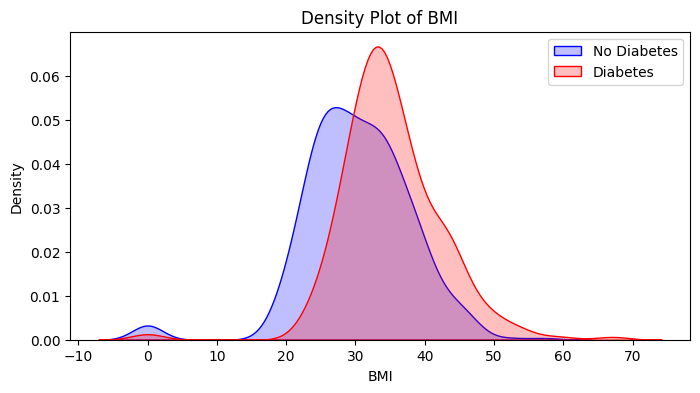

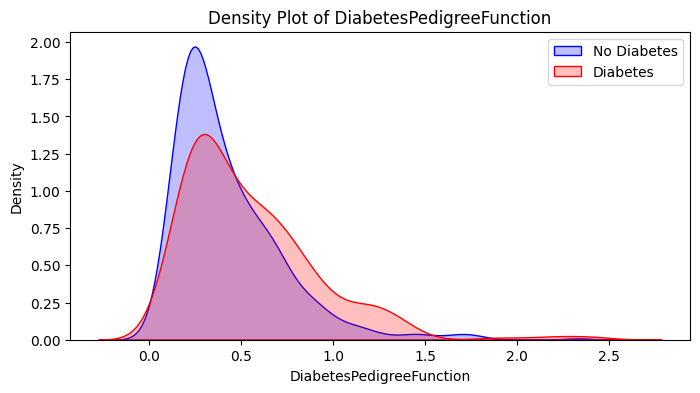

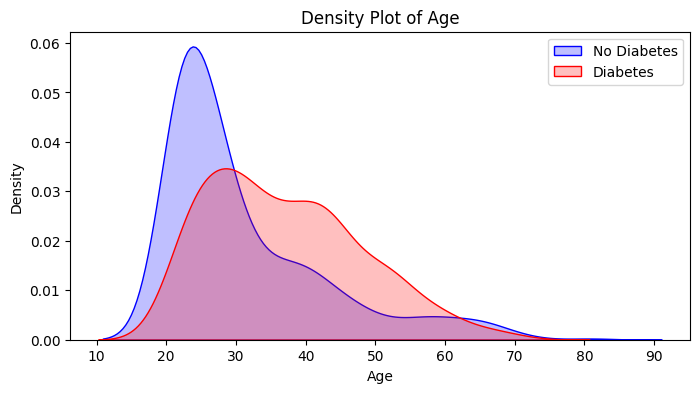

In [ ]:
# Density plots for each feature grouped by outcome
for col in data.columns[:-1]:  # exclude the 'Outcome' column
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data[col][data['Outcome'] == 0], label='No Diabetes', shade=True, color="blue")
    sns.kdeplot(data[col][data['Outcome'] == 1], label='Diabetes', shade=True, color="red")
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Step 3: Data Wrangling

In [9]:
def check_zero_values(data):
    print("Before Data Wrangling - Number of rows with 0 values for each variable\n")
    for col in data.columns:
        missing_values = data.loc[data[col] == 0].shape[0]
        print(f"{col}: {missing_values} rows with 0 values")
    print("=======================================")

# Run the function to check initial zero values
check_zero_values(data)

Before Data Wrangling - Number of rows with 0 values for each variable

Pregnancies: 111 rows with 0 values
Glucose: 5 rows with 0 values
BloodPressure: 35 rows with 0 values
SkinThickness: 227 rows with 0 values
Insulin: 374 rows with 0 values
BMI: 11 rows with 0 values
DiabetesPedigreeFunction: 0 rows with 0 values
Age: 0 rows with 0 values
Outcome: 500 rows with 0 values


In [10]:
#Replace 0's with mean values
def replace_zero_with_mean(data):
    cols_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    
    for col in cols_to_clean:
        data[col] = data[col].replace(0, np.nan)  # Replace 0s with NaN
        data[col].fillna(data[col].mean(), inplace=True)  # Fill NaNs with column mean

# Run the function to perform data cleaning
replace_zero_with_mean(data)

In [11]:
#Check zero values after cleaning
def check_zero_values_after_cleaning(data):
    print("After Data Wrangling - Number of rows with 0 values for each variable\n")
    for col in data.columns:
        missing_values = data.loc[data[col] == 0].shape[0]
        print(f"{col}: {missing_values} rows with 0 values")
    print("=======================================")

# Run the function to check if zero values were removed
check_zero_values_after_cleaning(data)

After Data Wrangling - Number of rows with 0 values for each variable

Pregnancies: 111 rows with 0 values
Glucose: 0 rows with 0 values
BloodPressure: 0 rows with 0 values
SkinThickness: 0 rows with 0 values
Insulin: 0 rows with 0 values
BMI: 0 rows with 0 values
DiabetesPedigreeFunction: 0 rows with 0 values
Age: 0 rows with 0 values
Outcome: 500 rows with 0 values


In [12]:
#Standardize the data
def standardize_data(data):
    scaler = StandardScaler()
    # Scale all columns except 'Outcome'
    features = data.drop(columns=['Outcome'])
    scaled_features = scaler.fit_transform(features)
    
    # Convert scaled features back to DataFrame and add 'Outcome' column
    data_scaled = pd.DataFrame(scaled_features, columns=features.columns)
    data_scaled['Outcome'] = data['Outcome'].values  # Add 'Outcome' back
    
    return data_scaled

# Run the function to standardize the data
data = standardize_data(data)

In [ ]:
#Perform data wrangling and feature engineering

In [13]:
data = datawrangling(data)

Before Data Wrangling - Number of rows with 0 values for each variable

Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500
After Data Wrangling - Number of rows with 0 values for each variable

Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


Step 4: Split dataset into training and test

In [14]:
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, 'Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Step 5: Build the Neural Network Model

In [17]:
# Step 1: Define the model
model = Sequential()

# Step 2: Add layers to the model
# Input layer with 32 neurons and ReLU activation
model.add(Dense(32, input_dim=8, activation='relu'))

# Hidden layer with 16 neurons and ReLU activation
model.add(Dense(16, activation='relu'))

# Output layer with 1 neuron and Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Fit (train) the model
history = model.fit(X_train, y_train, epochs=200, verbose = False)

Step 6: Check Performance Data

In [18]:
#Calculate train accuracy
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose= False)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 88.60%


In [19]:
#Calculate test accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose= False)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 77.92%


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


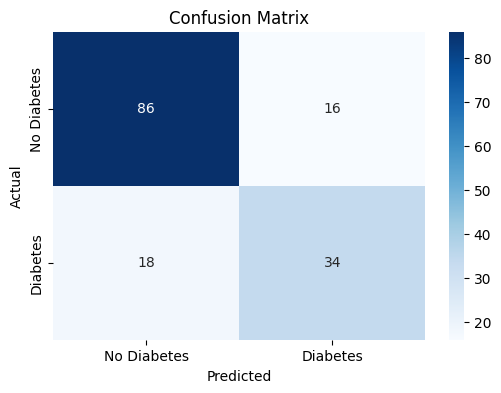

In [22]:
#Calculate confusion matrix
# Generate predictions for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


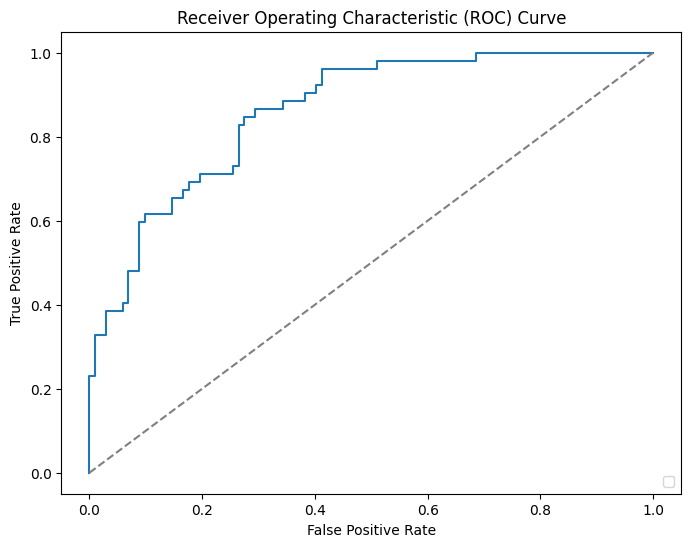

In [24]:
#Build ROC Curve
# Predict probabilities for the test set
y_pred_proba = model.predict(X_test).ravel()  # Flatten to 1D array

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random performance)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()